<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Mini_Project_Decision_Trees_%26_Ensemble_Methods_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# =====================================================================
# Mini-Project: Decision Trees & Ensemble Methods (Jupyter Notebook)
# Dataset: Credit dataset already loaded into `credit` DataFrame
#
# =====================================================================

# -------------------------
# Imports
# -------------------------
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)




In [24]:
credit=pd.read_csv('/content/drive/MyDrive/DATASETS/BankChurners.csv')

In [25]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [26]:
credit.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [27]:
credit.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [28]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [29]:
# ---------- Step 0: Remove leakage & irrelevant columns ----------
# Remove Naive Bayes leakage columns automatically (any column with "Naive_Bayes_Classifier" in name)
leak_cols = [c for c in credit.columns if "Naive_Bayes_Classifier" in c]
if leak_cols:
    print("Removing leakage columns:", leak_cols)
    credit = credit.drop(columns=leak_cols)

# Drop CLIENTNUM if present (identifier)
if 'CLIENTNUM' in credit.columns:
    credit = credit.drop(columns=['CLIENTNUM'])

print("Shape after dropping leakage/ID:", credit.shape)

Removing leakage columns: ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
Shape after dropping leakage/ID: (10127, 20)



Target value counts:


,count
Attrition_Flag,
0,8500
1,1627


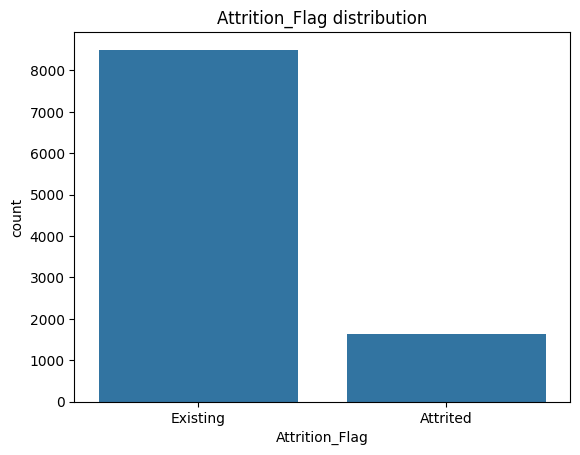

In [30]:
# Step 1: Target mapping and overview
# -------------------------
# Map Attrition_Flag to binary (0 = existing, 1 = attrited)
if credit['Attrition_Flag'].dtype == 'object':
    credit['Attrition_Flag'] = credit['Attrition_Flag'].map({
        'Existing Customer': 0, 'Attrited Customer': 1
    })

print("\nTarget value counts:")
display(credit['Attrition_Flag'].value_counts())
sns.countplot(x='Attrition_Flag', data=credit)
plt.title("Attrition_Flag distribution")
plt.xticks([0,1], ["Existing", "Attrited"])
plt.show()

In [31]:

# -------------------------
# Step 2: Feature selection & encoding
# -------------------------
# Drop CLIENTNUM (ID) if present
if 'CLIENTNUM' in credit.columns:
    credit = credit.drop(columns=['CLIENTNUM'])

# Categorical columns to encode (based on your info earlier)
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
cat_cols = [c for c in cat_cols if c in credit.columns]  # guard

print("\nCategorical columns to one-hot encode:", cat_cols)

# One-hot encode categorical variables (drop_first to avoid multicollinearity)
credit_enc = pd.get_dummies(credit, columns=cat_cols, drop_first=True)

print("\nAfter encoding shape:", credit_enc.shape)
display(credit_enc.head())


Categorical columns to one-hot encode: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

After encoding shape: (10127, 33)


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


In [32]:

# -------------------------
# Step 3: Prepare X and y, train-test split
# -------------------------
X = credit_enc.drop(columns=['Attrition_Flag'])
y = credit_enc['Attrition_Flag']

# Stratified split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTrain/test shapes:", X_train.shape, X_test.shape)
print("Train target distribution:")
display(y_train.value_counts(normalize=True))
print("Test target distribution:")
display(y_test.value_counts(normalize=True))


Train/test shapes: (8101, 32) (2026, 32)
Train target distribution:


,proportion
Attrition_Flag,
0,0.839279
1,0.160721


Test target distribution:


,proportion
Attrition_Flag,
0,0.839585
1,0.160415


In [33]:


# -------------------------
# Step 4: Feature scaling
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame (nice for plotting/feature names)
X_train_s_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_s_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# -------------------------
# Utility: evaluation function
# -------------------------
def evaluate_model(name, model, X_test, y_test, show_report=True):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    if show_report:
        print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    return {'model': name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'cm': cm}

results = []



=== Decision Tree ===
Accuracy : 0.9339
Precision: 0.8032
Recall   : 0.7785
F1-score : 0.7906

Confusion Matrix:
 [[1639   62]
 [  72  253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1701
           1       0.80      0.78      0.79       325

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.88      2026
weighted avg       0.93      0.93      0.93      2026



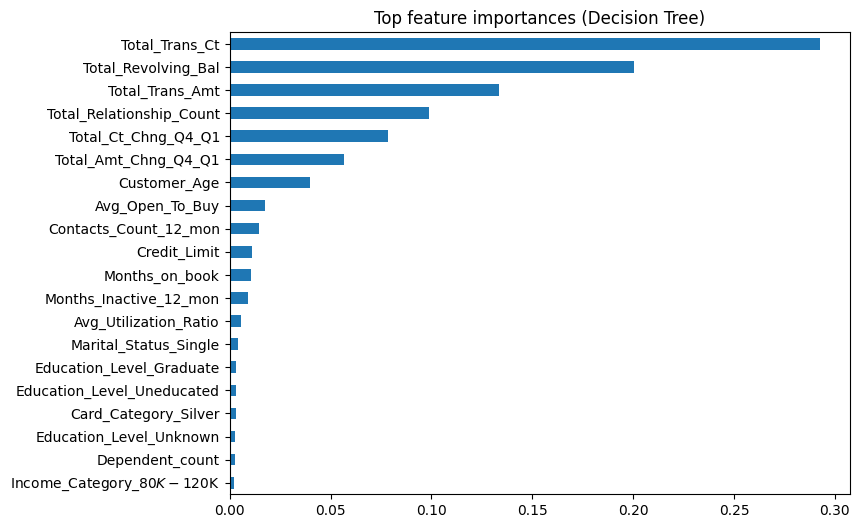

In [34]:

# -------------------------
# Step 5: Decision Tree
# -------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
res_dt = evaluate_model("Decision Tree", dt, X_test_scaled, y_test)
results.append(res_dt)

# Visualize tree (top levels) or feature importances
plt.figure(figsize=(10,6))
if X_train.shape[1] <= 12:
    plot_tree(dt, feature_names=X.columns, class_names=['Existing','Attrited'], filled=True, max_depth=3)
    plt.title("Decision Tree (top levels)")
    plt.show()
else:
    fi = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]
    fi.plot.barh(figsize=(8,6)); plt.gca().invert_yaxis()
    plt.title("Top feature importances (Decision Tree)"); plt.show()

Accuracy: 0.9339, but significantly lower precision/recall for class 1.

Recall = 0.7785, meaning about 22% of churn customers are still missed.

Trees tend to overfit, and the modest performance reflects that.

Still performs reasonably well, but not ideal for imbalanced data.

Summary: Simple and interpretable but weaker on minority class detection.


=== Random Forest ===
Accuracy : 0.9556
Precision: 0.9304
Recall   : 0.7815
F1-score : 0.8495

Confusion Matrix:
 [[1682   19]
 [  71  254]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.78      0.85       325

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.95      0.96      0.95      2026



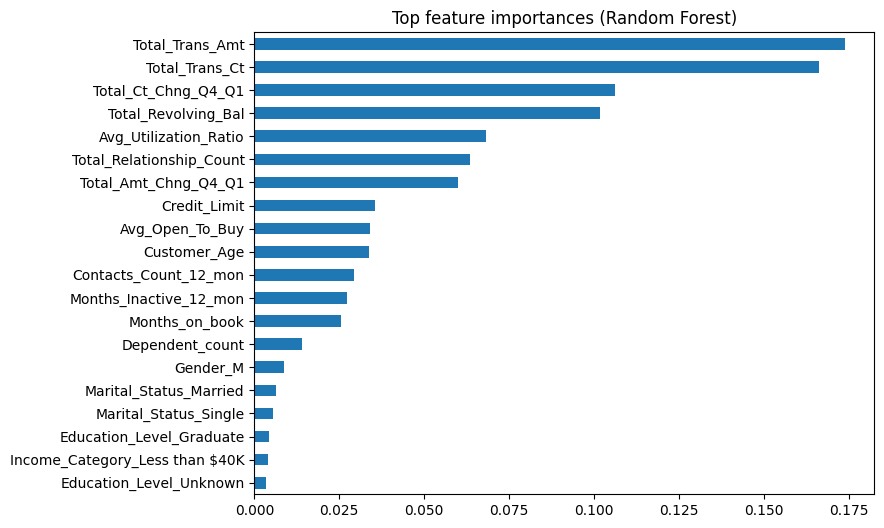

In [35]:

# -------------------------
# Step 6: Random Forest (Bagging)
# -------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
res_rf = evaluate_model("Random Forest", rf, X_test_scaled, y_test)
results.append(res_rf)

# Feature importances
plt.figure(figsize=(8,6))
fi_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]
fi_rf.plot.barh(); plt.gca().invert_yaxis(); plt.title("Top feature importances (Random Forest)"); plt.show()

Accuracy improves to 0.9556.

Precision = 0.9304, very high — the model rarely predicts "churn" incorrectly.

Recall = 0.7815, slightly higher than Decision Tree but still some attrited customers are missed.

Much more stable due to averaging across many trees.

Summary: Strong baseline model with the best precision, but recall can still be improved.

In [36]:

# -------------------------
# Step 7: AdaBoost (Boosting)
# -------------------------
weak = DecisionTreeClassifier(max_depth=1, random_state=42)
# compatibility for sklearn versions: estimator or base_estimator
try:
    ada = AdaBoostClassifier(estimator=weak, n_estimators=100, learning_rate=0.8, random_state=42)
except TypeError:
    ada = AdaBoostClassifier(base_estimator=weak, n_estimators=100, learning_rate=0.8, random_state=42)

ada.fit(X_train_scaled, y_train)
res_ada = evaluate_model("AdaBoost", ada, X_test_scaled, y_test)

results.append(res_ada)


=== AdaBoost ===
Accuracy : 0.9521
Precision: 0.9419
Recall   : 0.7477
F1-score : 0.8336

Confusion Matrix:
 [[1686   15]
 [  82  243]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.94      0.75      0.83       325

    accuracy                           0.95      2026
   macro avg       0.95      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



Accuracy: 0.9521, similar to RF.

Precision: 0.9419, the highest among all models.

Recall drops to 0.7477, meaning it misses more churn cases than RF.

AdaBoost prioritizes correcting previous errors, but on imbalance it may focus too heavily on majority class.

Summary: Very precise but compromises recall—may not be ideal when identifying churn is critical.

In [37]:

# -------------------------
# Step 8: Stacking Ensemble
# -------------------------
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
]
meta = LogisticRegression(max_iter=1000)
stack = StackingClassifier(estimators=base_learners, final_estimator=meta, cv=5, n_jobs=-1, passthrough=False)
stack.fit(X_train_scaled, y_train)
res_stack = evaluate_model("Stacking Ensemble", stack, X_test_scaled, y_test)
results.append(res_stack)


=== Stacking Ensemble ===
Accuracy : 0.9590
Precision: 0.9116
Recall   : 0.8246
F1-score : 0.8659

Confusion Matrix:
 [[1675   26]
 [  57  268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.91      0.82      0.87       325

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



Best overall performance: Accuracy = 0.9590

Precision = 0.9116, slightly lower than RF and AdaBoost but still strong.

Recall = 0.8246, the highest among all models.

F1-score = 0.8659, best harmonic balance of precision and recall.

Stacking benefits from combining different model strengths (RF + KNN + SVM + Logistic Regression meta-learner).

Summary: Best model overall; captures most churn cases while maintaining strong precision.


=== Model comparison (test set) ===


,accuracy,precision,recall,f1
model,,,,
Decision Tree,0.9339,0.8032,0.7785,0.7906
Random Forest,0.9556,0.9304,0.7815,0.8495
AdaBoost,0.9521,0.9419,0.7477,0.8336
Stacking Ensemble,0.9590,0.9116,0.8246,0.8659


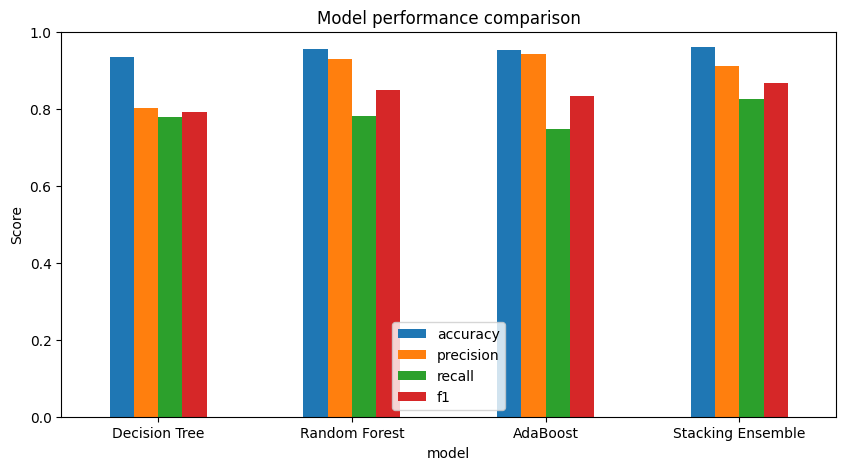

In [38]:


# -------------------------
# Step 9: Results summary table
# -------------------------
summary_df = pd.DataFrame(results).set_index('model')[['accuracy','precision','recall','f1']]
print("\n=== Model comparison (test set) ===")
display(summary_df.style.format("{:.4f}"))

# Bar plot comparison
summary_df.plot.bar(rot=0, figsize=(10,5), ylim=(0,1))
plt.title("Model performance comparison")
plt.ylabel("Score")
plt.show()


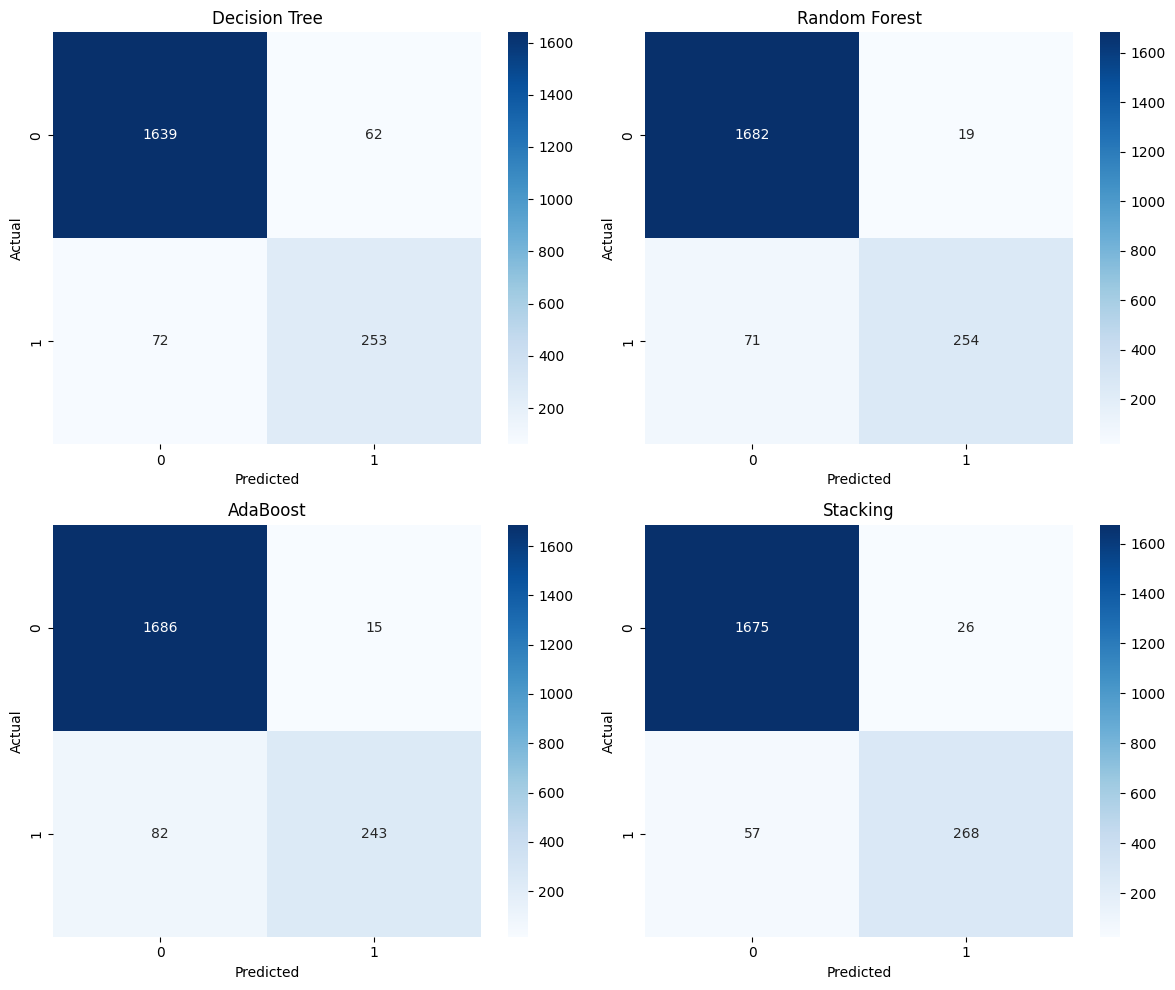

In [41]:



# -------------------------
# Step 10: Confusion matrices heatmaps
# -------------------------
fig, axes = plt.subplots(2,2, figsize=(12,10))
mats = [
    (res_dt['cm'], "Decision Tree"),
    (res_rf['cm'], "Random Forest"),
    (res_ada['cm'], "AdaBoost"),
    (res_stack['cm'], "Stacking")
]
for ax, (cm, title) in zip(axes.ravel(), mats):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()





# -------------------------
# **Final Discussion**
# -------------------------

**Overall Conclusion & Recommendation**

The customer attrition dataset is highly imbalanced, with only 16% churners. Because of this, the most important goal is to correctly identify customers who are likely to leave (high recall), without generating too many false alarms (maintaining good precision and F1-score).

After evaluating all four models—Decision Tree, Random Forest, AdaBoost, and the Stacking Ensemble—the results show clear performance differences:

Decision Tree performed moderately but struggled with minority class recall.

AdaBoost achieved very high precision but lower recall, meaning more churners were missed.

Random Forest delivered strong precision and stable overall performance, but still left room for improvement in recall.

The Stacking Ensemble achieved the best balance, with:

The highest recall (0.8246) — most churners correctly detected.

The highest F1-score (0.8659) — best overall balance of precision and recall.

The highest accuracy (0.9590) — strongest general performance across classes.

 **Recommendation**

Based on the performance on our dataset, the Stacking Ensemble model is the best and should be selected as the final model for deployment.

It provides the most reliable and well-balanced predictions, especially for the minority churn class, making it the most effective model for practical customer retention strategies.
